# Task 4: Prediction using Decision Tree  Algorithm

Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r'C:\Users\Divyansh Tyagi\OneDrive\Desktop\divyansh\Projects\Letsgrowmore\project 4\Iris.csv'

In [3]:
path_x=''
for i in path:
    if i =='\\':
        path_x=path_x+'/'
    else:
        path_x=path_x+i
path=path_x
print(path)

C:/Users/Divyansh Tyagi/OneDrive/Desktop/divyansh/Projects/Letsgrowmore/project 4/Iris.csv


In [4]:
df = pd.read_csv(path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Dropping the column 'ID'

In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
corr=df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


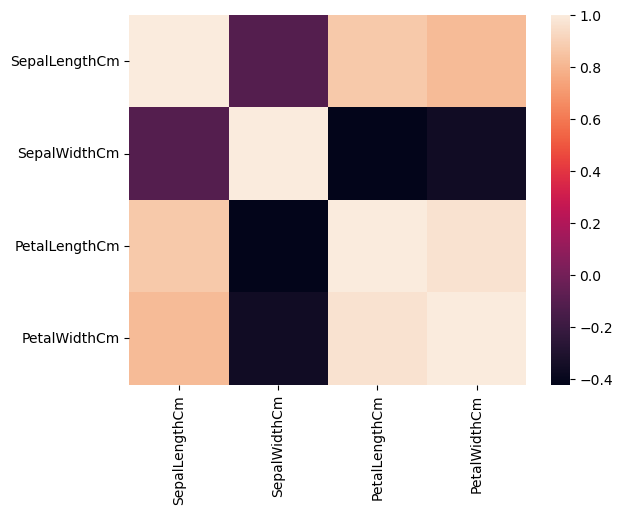

In [9]:
sns.heatmap(corr)
plt.show()

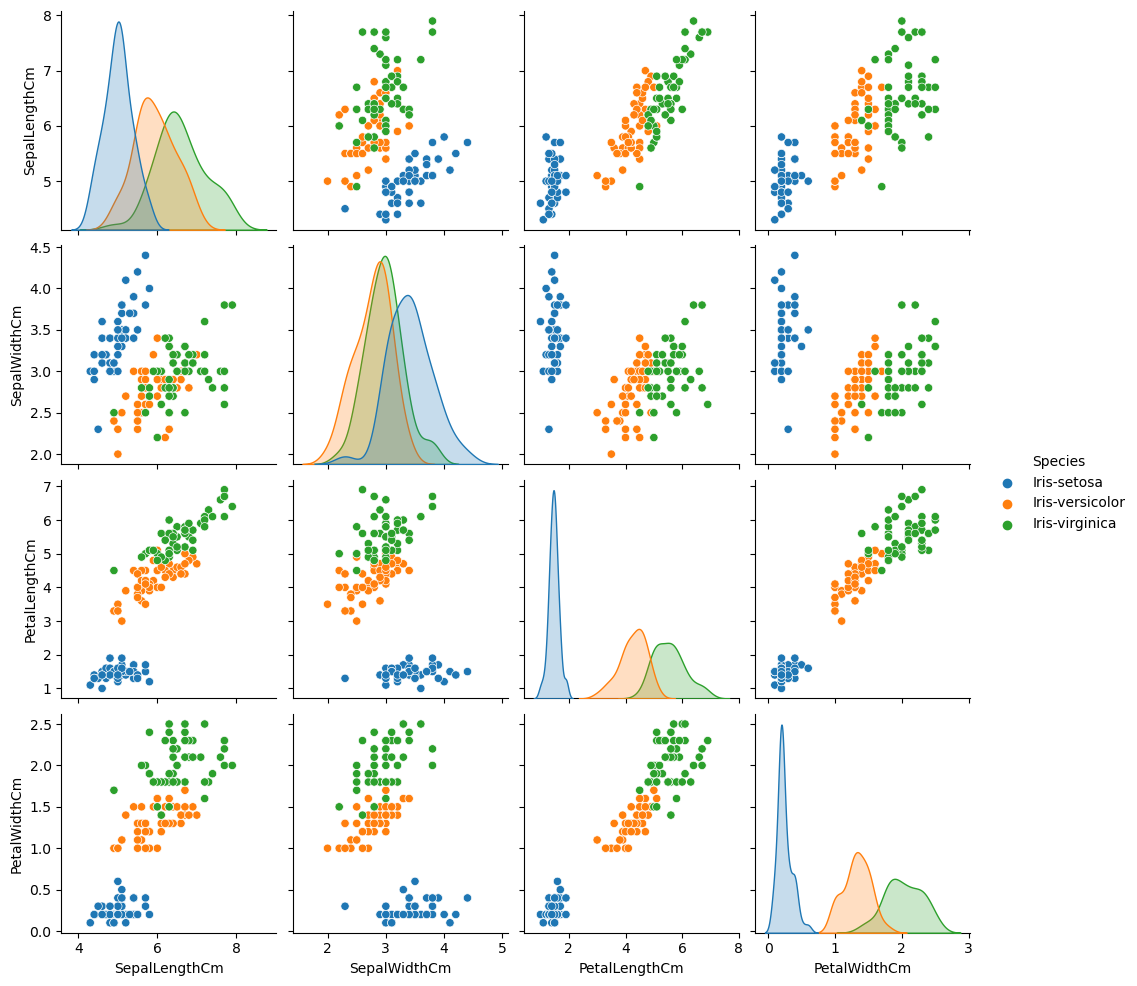

In [10]:
sns.pairplot(df,hue='Species')
plt.show()

In [11]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Data Pre-Processing Step

In [12]:
X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
Y=df[['Species']].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=1)

In [14]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

# Fitting a Decision-Tree algorithm to the Training set and Predicting  the results

In [15]:
dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train, y_train)

In [16]:
y_pred = dtc.predict(x_test)

In [17]:
print('----------------------------Confusion Matrix----------------------------')
print(confusion_matrix(y_test, y_pred))

----------------------------Confusion Matrix----------------------------
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [18]:
print('-------------------------Classification Report-------------------------')
print(classification_report(y_test, y_pred))

-------------------------Classification Report-------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [19]:
print('-------------------------------Accuracy-------------------------------')
print(accuracy_score(y_test, y_pred))

-------------------------------Accuracy-------------------------------
0.9736842105263158


# Plotting The Decision Tree

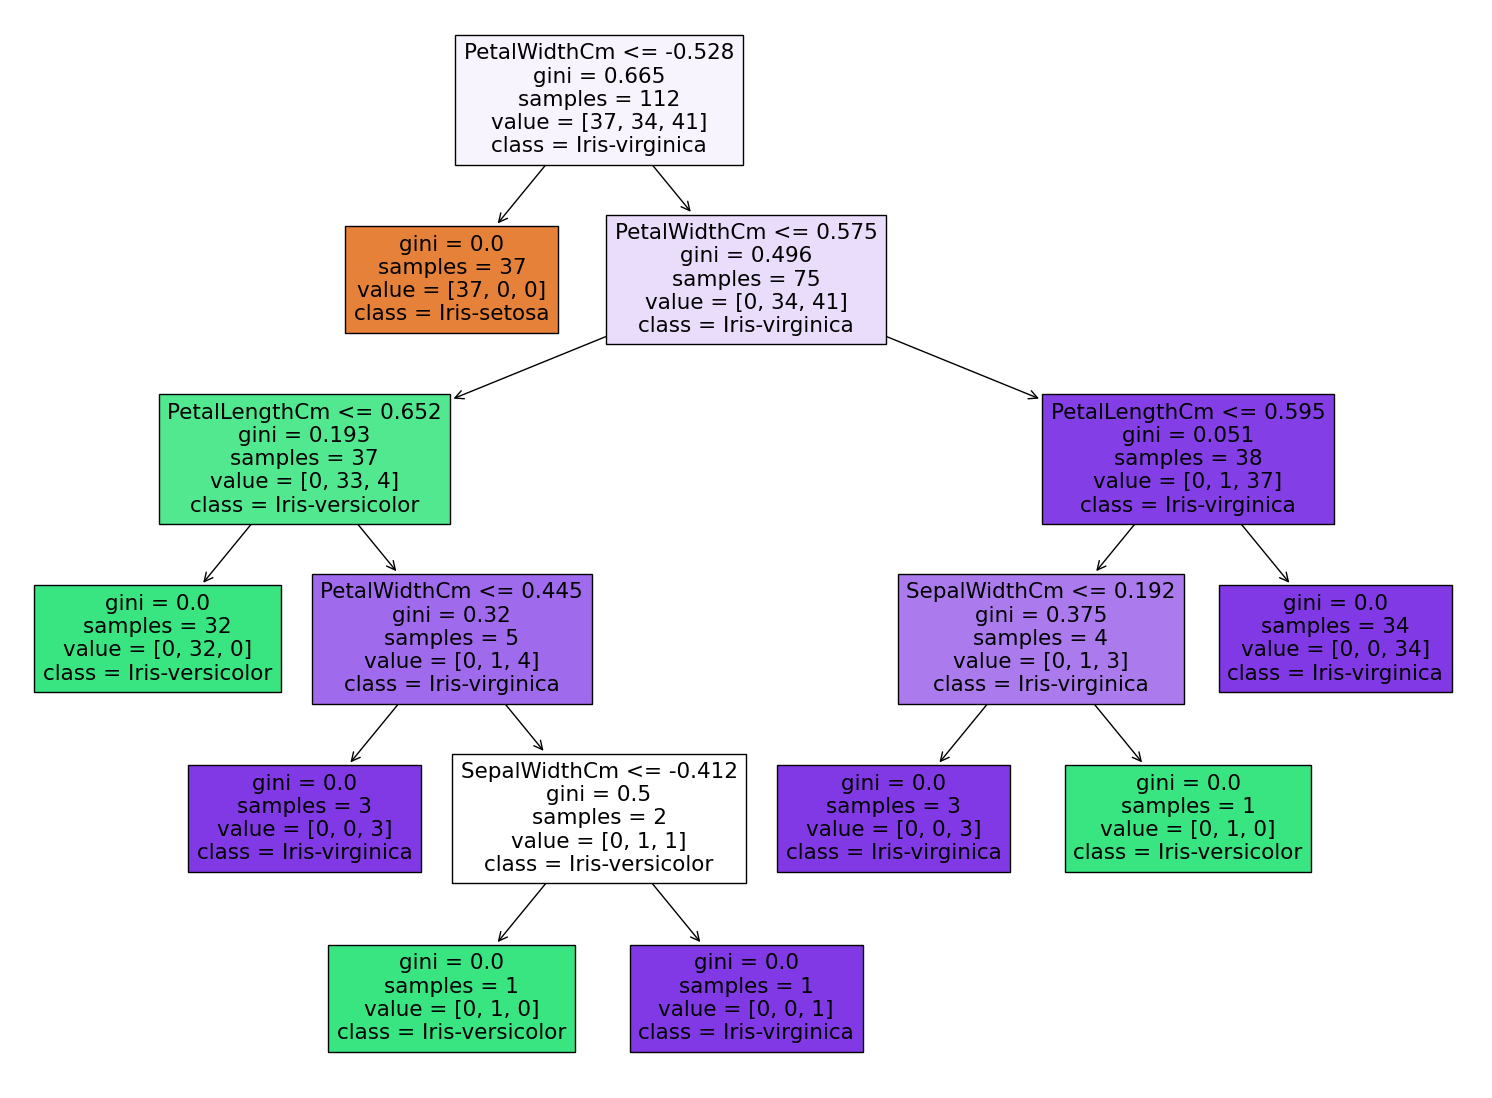

In [20]:
plt.figure(figsize=(19, 14))
plot_tree(dtc, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)
plt.show()